In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 10.1.3 퍼셉트론

TLU(Threshold Logic Unit) or LTU(Linear Threshold Unit)이라고 불리는 조금 다른 형태의 인공 뉴런을 기반으로 함(입력과 출력이 이진값이 아닌 어떤 숫자이고, 각각의 입력 연결은 가중치와 연결되어 있음) TLU는 입력의 가중치 합을 계산($z = w_1x_1 + w_2x_2 + ... + w_nx_n = x^Tw$)한 뒤 계산된 합에 계단함수를 적용하여 결과를 출력.

$h_w(x) = step(z)$

퍼셉트론에서 가장 널리 쓰이는 계단 함수는 헤비사이드 계단함수( z<0일때 0, z$\ge$0일때 1, 부호함수 대신에 사용하기도 함)

하나의 TLU는 간단한 선형 이진 분류문제에 활용할 수 있음. 입력의 선형 조합을 계산해 그 값이 임계값을 넘으면 양성클래스, 아니면 음성클래스를 출력한다.

퍼셉트론은 층이 하나뿐인 TLU로 구성. 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 완전 연결층(or 밀집 층)이라고 부르며, 퍼셉트론의 입력은 입력뉴런이라 불리는 특별한 통과 뉴런(입력값 그대로 출력)에 주입.

(완전 연결 층의 출력 계산) $h_{W, b}(X) = \phi (XW + b)$
- X : 입력 특성의 행렬
- W : 가중치 행렬
- b : 편향 벡터
- $\phi$ : 활성화함수. 인공뉴런이 TLU일 경우 이 함수는 계단함수

퍼셉트론은 헤브의 규칙(두 뉴런이 동시에 활성화될 때 마다 이들 사이의 연결 가중치가 증가하는 경향)을 기반으로 하나 네트워크가 예측할 때 만드는 오차를 반영하도록 약간 변형하여 학습
$w_{i, j}^{(next step)} = w_{i, j} + \eta (y_j - \hat{y_j})x_j $
- $w_{i, j}$ : i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
- $x_i$ : 현재 훈련 샘플의 i번째 뉴런의 입력값
- $\hat{y_j}$ : 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
- $y_j$ : 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값
- $\eta$ : 학습률

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]     # 꽃잎 길이와 너비만 활용
y = (iris.target==0).astype(np.int)      # 부채붓꽃(Setosa)이면 1, 아니면 0

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\ytnal\AppData\Local\Temp\ipykernel_4816\395347572.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target==0).astype(np.int)      # 부채붓꽃(Setosa)이면 1, 아니면 0


In [3]:
y_pred

array([1])

그림 저장: perceptron_iris_plot


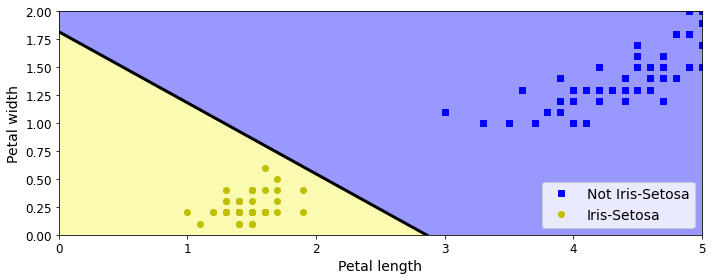

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

퍼셉트론은 XOR 분류문제 등 일부 간단한 문제를 풀 수 없는 약점 존재. 

퍼셉트론을 여러 개 쌓아올리면 일부 제약이 줄어듬 -> 다중 퍼셉트론(MLP)

## 10.1.4 다중 퍼셉트론과 역전파

다중 퍼셉트론은 입력층(input layer) 하나와 은닉층(hidden layer)라 불리는 하나 이상의 TLU 층과 마지막 출력층(output layer)로 구성. 출력층을 제외하고 모든 층은 편향 뉴런을 포함하여 다음 층과 완전히 연결됨.

(신호는 입력->출력 한 방향으로만 흐르므로, 이 구조를 feed-forward 신경망, FNN이라 부름)

- DNN(심층 신경망) : 은닉층을 여러 개 쌓아 올린 인공 신경망

다중 퍼셉트론을 훈련하는 방법 -> 역전파(네트워크를 정방향, 역방향 한번씩 통과하는 것 만으로도 모든 모델 파라미터에 대한 네트워크 오차의 그라디언트를 계산하는 알고리즘)

- ex) 32개의 샘플이 포함된 하나의 미니배치씩 전체 훈련 세트를 처리하는데, 이 과정을 여러번 반복한다. 이 반복을 에포크라 칭한다.
- 각 미니배치는 네트워크의 input layer으로 전달되어 첫번째 hidden layer로 전달된다. 그 다음 해당층에 있는 모든 뉴런의 출력을 계산하고, 다음 층으로 전달된다(정방향 계산). 이러한 계산은 output layer로 전달되어 출력을 계산할 때까지 지속된다.
- 알고리즘이 네트워크의 출력 오차를 측정한다.
- 각 출력 연결이 오차에 기여하는 정도를 계산한다.(chain rule을 통해 바르게 수행)
- 또 다시 chain rule을 적용하여 이전 층의 웨이트가 이 오차의 기여 정도에 얼마나 기여했는지 측정. 이렇게 input layer에 도달할 때까지 역방향으로 계속된다.
- 마지막으로 알고리즘은 Gradient Descent를 통해 방금 계산한 오차 그라디언트를 업데이트한다.

이 알고리즘이 잘 작동하고자 계단함수에 여러 활성화 함수를 정의.
- Sigmoid(Logistic) Function : $\sigma(z) ={1 \over{1 + exp(-z)}}$
- 쌍곡 탄젠트 함수 : $tanh(z) = 2 \sigma (2z)$
- ReLU : ReLu(z) = max(0, z)    -> 연속적이지만 z=0에서 미분가능하지 않으며, z<0일 경우 기울기는 0이다. 하지만 실제로는 잘 작동하며 계산속도가 빠르다는 장점 덕분에 기본 Activation Function이 됨

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


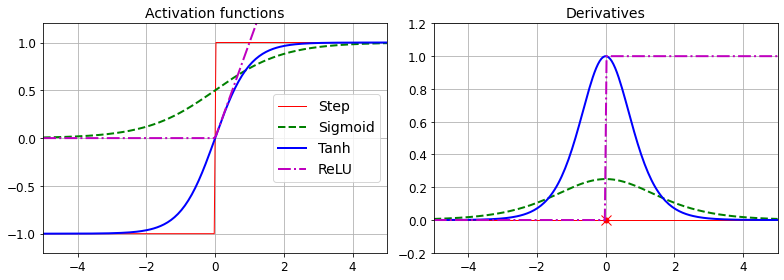

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## 10.2.2 시퀀셜 API를 이용하여 이미지 분류기 만들기

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
# 훈련셋의 첫번째 데이터는 코트
class_names[y_train[0]]

'Coat'

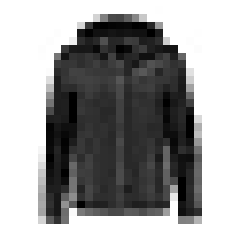

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off');

그림 저장: fashion_mnist_plot


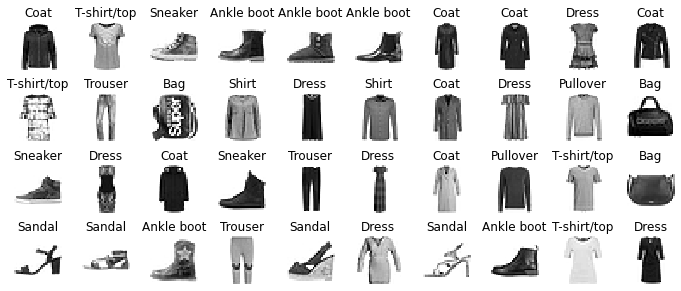

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

- 첫번째 라인 : 케라스의 가장 간단한 신경망 모델인 Sequential 모델을 생성
- Flatten 층은 입력 이미지를 1D 배열로 변환. 즉 X.reshape(-1, 28*28)을 계산
- Dense 층은 각자 가중치 행렬을 관리
- 분류 문제이고, 분류 클래스가 10개이므로 10개의 뉴런을 가진 softmax 함수로 마지막을 추가

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# 앞에서처럼 하나하나 add 안해주고 한번에 만들 수도 있음
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 위의 뉴런층 시각화... 인데 망할놈의 graphviz
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer('dense') is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
biases.shape

(300,)

In [32]:
# 모델 컴파일
# 레이블이 정수 하나이고, 배타적이므로 sparse_categorical_crossentropy를 사용,
# 만약 샘플마다 클래스별 확률을 가진다면 categorical_crossentropy를 사용해야 함
# 만약 이진분류나 다중레이블 이진분류라면 출력층에 softmax 대신 sigmoid를 쓰고 binary_crossentropy 손실을 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [34]:
# 클래스별 비중이 편중되어있다면 fit() 인자 안에 class_weight로 적게 등장하는 클래스에 높은 가중치를 부여하면 됨

history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5337 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8675 - val_loss: 0.3703 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3619 - val_accuracy:

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

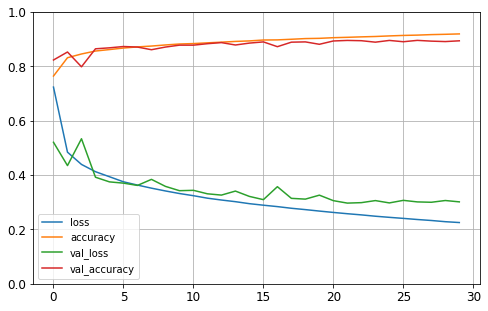

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8837


[0.3353557586669922, 0.8837000131607056]

모델을 사용해 예측을 만들기

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 106ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# 클래스 출력
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 21ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장: fashion_mnist_images_plot


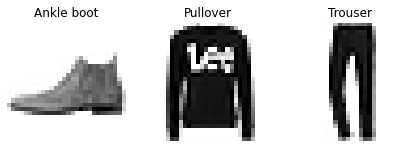

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## 10.2.3 시퀀셜 API를 사용하여 회귀용 MLP 만들기

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)          # trian셋으로 fit을 했고, train 데이터에 fitting 되어있으므로 valid와 test는 fit을 안함
X_test = scaler.transform(X_test)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)       # 하나의 값을 예측하므로 활성화함수가 없는 하나의 뉴런
])
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8428 - val_loss: 0.8776
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5852 - val_loss: 0.4970
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4724 - val_loss: 0.4692
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4445 - val_loss: 0.4594
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4324 - val_loss: 0.4495
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4237 - val_loss: 0.4425
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4318
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4082 - val_loss: 0.4311
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4018 - val_loss: 0.4230
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3981 - val_loss: 0.4195

In [53]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[0.63506544],
       [1.7379583 ],
       [3.5857036 ]], dtype=float32)

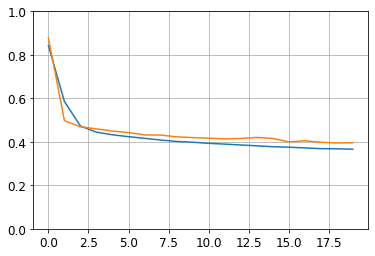

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])       # 두번째 은닉층과 인풋층을 연결
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 30)           930         ['dense_7[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_8[0][0]']            

In [58]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3035 - val_loss: 0.7101
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6619 - val_loss: 0.6456
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6156 - val_loss: 0.6133
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5873 - val_loss: 0.5928
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5470 - val_loss: 0.5567
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5324 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.5318
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5088 - val_loss: 0.5219
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4994 - val_loss: 0.5134

일부 특성은 짧은 경로로 전달, 다른 특성은 깊은 경로로 전달하는 함수형 API

(0 ~ 4), (2 ~ 7)

In [59]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [60]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data = ((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


C:\Users\ytnal\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 1.7568 - val_loss: 0.8360
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7706 - val_loss: 0.7083
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6772 - val_loss: 0.6531
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6295 - val_loss: 0.6206
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5971 - val_loss: 0.5948
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5729 - val_loss: 0.5758
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5552 - val_loss: 0.5623
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5407 - val_loss: 0.5489
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5293 - val_loss: 0.5397
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5201 - val_loss: 0.5320
Epoch 11/2

규제를 위한 보조출력 추가

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [64]:
# 출력이 2개이므로 손실함수도 두개, 보조출력보다 주출력에 관심이 더 많으므로 가중치 조절
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [65]:
# 주출력과 보조출력이 같은 것을 예측하므로 둘다 y_train임
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9609 - main_output_loss: 0.8797 - aux_output_loss: 1.6922 - val_loss: 0.7013 - val_main_output_loss: 0.6408 - val_aux_output_loss: 1.2455
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6081 - main_output_loss: 0.5576 - aux_output_loss: 1.0629 - val_loss: 0.5657 - val_main_output_loss: 0.5206 - val_aux_output_loss: 0.9708
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5384 - main_output_loss: 0.4976 - aux_output_loss: 0.9050 - val_loss: 0.5294 - val_main_output_loss: 0.4957 - val_aux_output_loss: 0.8328
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5053 - main_output_loss: 0.4762 - aux_output_loss: 0.7672 - val_loss: 0.5135 - val_main_output_loss: 0.4868 - val_aux_output_loss: 0.7534
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4868 - main_output_loss: 0.4611 - aux_output_loss: 0.7186 - val_loss

In [66]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3793 - main_output_loss: 0.3669 - aux_output_loss: 0.4912


In [67]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 81ms/step


## 10.2.5 서브클래싱 API로 동적 모델 만들기

시퀀셜 API와 함수형 API는 모두 선언적(사용할 층과 연결방식을 먼저 정의)이기 때문에 모델 저장, 복사, 공유, 구조출력, 디버깅 등에 좋지만 정적이기 때문에 단점 존재

어떤 모델은 반복문을 포함하고 다양한 크기를 다루어야하며 조건문을 가지는 등 여러 동적 구조가 필요하다 -> 서브클래싱 API

In [71]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)       # 표준매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation='relu')

In [72]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6398 - output_1_loss: 2.3376 - output_2_loss: 5.3598 - val_loss: 1.3607 - val_output_1_loss: 0.9834 - val_output_2_loss: 4.7563
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1705 - output_1_loss: 0.8685 - output_2_loss: 3.8881 - val_loss: 0.9535 - val_output_1_loss: 0.7075 - val_output_2_loss: 3.1673
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8836 - output_1_loss: 0.6790 - output_2_loss: 2.7249 - val_loss: 0.8195 - val_output_1_loss: 0.6535 - val_output_2_loss: 2.3132
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7824 - output_1_loss: 0.6323 - output_2_loss: 2.1340 - val_loss: 0.7518 - val_output_1_loss: 0.6227 - val_output_2_loss: 1.9139
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7275 - output_1_loss: 0.6037 - output_2_loss: 1.8425 - val_loss: 0.7101 - val_output_1_loss: 0.5987 - val_ou

사용하는 것은 동일하게 사용할 수 있지만 call() 메서드 안에 모델이 숨겨져 있기 때문에 케라스가 쉽게 분석 할 수 없음

## 10.2.6 모델 저장과 복원

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    


model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 957us/step - loss: 0.4842


In [75]:
model.save('my_keras_model.h5')

In [76]:
model = keras.models.load_model('my_keras_model.h5')

In [77]:
model.save_weights("my_keras_weights.ckpt")

In [78]:
model.load_weights("my_keras_weights.ckpt")

## 10.2.7 콜백 사용하기

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')      # 최상의 모델로 복원

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4771 - val_loss: 0.4883

In [81]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 923us/step - loss: 0.4842


In [82]:
# 조기종료 구현
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4696 - val_loss: 0.4839
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4642 - val_loss: 0.4775
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4595 - val_loss: 0.4728
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4550 - val_loss: 0.4719
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4533 - val_loss: 0.4663
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4484 - val_loss: 0.4643
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4457 - val_loss: 0.4614
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4428 - val_loss: 0.4594
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4407 - val_loss: 0.4571
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4388 - val_lo

In [83]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 981us/step - loss: 0.3682


In [84]:
# 사용자 정의 콜백
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [85]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

336/363 [==========================>...] - ETA: 0s - loss: 0.3545
val/train: 1.07
363/363 [==============================] - 1s 1ms/step - loss: 0.3531 - val_loss: 0.3790


## 10.2.8 텐서보드를 이용한 시각화

In [2]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_09_18-16_01_25'

In [5]:
import numpy as np
import tensorflow as tf
import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [8]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4771 - val_loss: 0.4883

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [95]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_08_13-20_03_29'

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [98]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7432 - val_loss: 2.0988
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

In [100]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100)+2) * step /100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 *2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

# 10.3 신경망 하이퍼파라미터 튜닝

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [107]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\ytnal\AppData\Local\Temp\ipykernel_4816\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [109]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2085 - val_loss: 0.6912
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6392 - val_loss: 0.5978
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5639 - val_loss: 0.5487
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5210 - val_loss: 0.5207
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4968 - val_loss: 0.5010
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4797 - val_loss: 0.4917
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4675 - val_loss: 0.4785
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4583 - val_loss: 0.4713
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4522 - val_loss: 0.4655
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4477 - val_lo

In [110]:
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2),
}

rnd_serach_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_serach_cv.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), 
                  callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.4266 - val_loss: 1.9376
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3169 - val_loss: 1.0370
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8530 - val_loss: 0.8178
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7292 - val_loss: 0.7415
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6829 - val_loss: 0.7035
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6573 - val_loss: 0.6819
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6391 - val_loss: 0.6626
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6244 - val_loss: 0.6455
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6120 - val_loss: 0.6337
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6014 - val_lo

Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5056 - val_loss: 0.5394
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5055 - val_loss: 0.5394
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5054 - val_loss: 0.5397
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.5374
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5055 - val_loss: 0.5378
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5054 - val_loss: 0.5384
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5053 - val_loss: 0.5377
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5054 - val_loss: 0.5375
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5053 - val_loss: 0.5383
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5052

242/242 [==============================] - 0s 1ms/step - loss: 0.5220 - val_loss: 0.5495
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5248 - val_loss: 0.5370
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5224 - val_loss: 0.5364
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5205 - val_loss: 0.5468
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5221 - val_loss: 0.5500
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5208 - val_loss: 0.5437
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5238 - val_loss: 0.5376
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5209 - val_loss: 0.5532
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5210 - val_loss: 0.5375
Epoch 24/100
121/121 [==============================] - 0s 788us/step - loss: 0.5333
Epoch 1/10

Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5350 - val_loss: 0.5641
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5269 - val_loss: 0.5561
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 0.5495
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5128 - val_loss: 0.5424
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5066 - val_loss: 0.5365
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5007 - val_loss: 0.5310
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4955 - val_loss: 0.5267
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4905 - val_loss: 0.5209
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4862 - val_loss: 0.5168
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4817

Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4179 - val_loss: 0.4397
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4170 - val_loss: 0.4388
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.4379
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4153 - val_loss: 0.4372
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4146 - val_loss: 0.4364
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4136 - val_loss: 0.4365
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4129 - val_loss: 0.4349
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4121 - val_loss: 0.4347
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4114 - val_loss: 0.4335
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4107

Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5700 - val_loss: 0.5973
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5648 - val_loss: 0.5920
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5599 - val_loss: 0.5872
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5551 - val_loss: 0.5824
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5506 - val_loss: 0.5779
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5462 - val_loss: 0.5736
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5420 - val_loss: 0.5692
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5379 - val_loss: 0.5655
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5341 - val_loss: 0.5615
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5303

242/242 [==============================] - 0s 2ms/step - loss: 0.4347 - val_loss: 0.4545
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4341 - val_loss: 0.4540
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4332 - val_loss: 0.4533
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4525
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4319 - val_loss: 0.4520
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4311 - val_loss: 0.4519
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4306 - val_loss: 0.4519
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4299 - val_loss: 0.4506
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4293 - val_loss: 0.4501
Epoch 100/100
121/121 [==============================] - 0s 928us/step - loss: 0.4109
Epoch 1/1

242/242 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.5567
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.3903
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3579 - val_loss: 0.3923
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3590 - val_loss: 0.3956
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.3916
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3539 - val_loss: 0.3961
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3526 - val_loss: 0.4001
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3525 - val_loss: 0.3945
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3501 - val_loss: 0.3887
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3499 - val_loss: 

Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3635 - val_loss: 0.4056
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.4034
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3606 - val_loss: 0.4064
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3599 - val_loss: 0.4096
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 0.4075
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 0.4008
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3577 - val_loss: 0.4005
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3562 - val_loss: 0.4000
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3549 - val_loss: 0.4015
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3560

Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6463 - val_loss: 0.6544
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6405 - val_loss: 0.6489
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6352 - val_loss: 0.6438
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6301 - val_loss: 0.6389
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6250 - val_loss: 0.6342
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6203 - val_loss: 0.6296
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.6253
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6111 - val_loss: 0.6209
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6068 - val_loss: 0.6168
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6025

242/242 [==============================] - 0s 2ms/step - loss: 0.4564 - val_loss: 0.4914
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4554 - val_loss: 0.4896
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4536 - val_loss: 0.4883
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4522 - val_loss: 0.4866
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4506 - val_loss: 0.4856
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4494 - val_loss: 0.4844
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4482 - val_loss: 0.4832
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4469 - val_loss: 0.4817
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4456 - val_loss: 0.4809
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4446 - val_loss: 

Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4612 - val_loss: 0.4831
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4592 - val_loss: 0.4815
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4573 - val_loss: 0.4797
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4555 - val_loss: 0.4781
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4537 - val_loss: 0.4768
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4519 - val_loss: 0.4752
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4503 - val_loss: 0.4738
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4487 - val_loss: 0.4725
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4471 - val_loss: 0.4712
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4456

Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.4452
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4092 - val_loss: 0.4435
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4075 - val_loss: 0.4422
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4056 - val_loss: 0.4451
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.4387
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4012 - val_loss: 0.4492
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4001 - val_loss: 0.4347
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3984 - val_loss: 0.4349
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3976 - val_loss: 0.4347
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3952

242/242 [==============================] - 0s 1ms/step - loss: 0.3343 - val_loss: 0.3808
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3343 - val_loss: 0.3795
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3331 - val_loss: 0.3794
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3324 - val_loss: 0.3816
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3329 - val_loss: 0.3788
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3320 - val_loss: 0.3776
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3309 - val_loss: 0.3797
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.3769
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3298 - val_loss: 0.3791
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3296 - val_loss: 

Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5775 - val_loss: 0.6035
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5761 - val_loss: 0.6019
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5748 - val_loss: 0.6003
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5735 - val_loss: 0.5988
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5723 - val_loss: 0.5973
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5711 - val_loss: 0.5960
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5699 - val_loss: 0.5947
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5688 - val_loss: 0.5934
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5677 - val_loss: 0.5921
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5666

Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6780 - val_loss: 0.6843
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6695 - val_loss: 0.6769
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6625 - val_loss: 0.6708
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6566 - val_loss: 0.6655
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6514 - val_loss: 0.6608
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6468 - val_loss: 0.6568
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6427 - val_loss: 0.6531
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6390 - val_loss: 0.6496
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6355 - val_loss: 0.6464
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6323

Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3126 - val_loss: 0.3541
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3133 - val_loss: 0.3526
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3129 - val_loss: 0.3518
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3115 - val_loss: 0.3502
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3106 - val_loss: 0.3560
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3539
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3498
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3092 - val_loss: 0.3505
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3085 - val_loss: 0.3511
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3094

Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3601 - val_loss: 0.3908
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3581 - val_loss: 0.3925
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3574 - val_loss: 0.3881
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3544 - val_loss: 0.3905
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3540 - val_loss: 0.3885
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3528 - val_loss: 0.3904
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3503 - val_loss: 0.3877
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3501 - val_loss: 0.3826
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3482 - val_loss: 0.3826
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3467

363/363 [==============================] - 1s 1ms/step - loss: 0.2948 - val_loss: 0.3326
Epoch 98/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2951 - val_loss: 0.3298
Epoch 99/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2899 - val_loss: 0.3330
Epoch 100/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2901 - val_loss: 0.3303


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001B9370FE310>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9370FED60>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [115]:
rnd_serach_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [116]:
rnd_serach_cv.best_score_

-0.3250718414783478

In [117]:
rnd_serach_cv.best_estimator_

In [118]:
rnd_serach_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3114


-0.31140896677970886

In [119]:
model = rnd_serach_cv.best_estimator_.model
model

In [120]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3114


0.31140896677970886

# 퍼셉트론의 하이퍼파라미터 선택 요령

## 10.3.1 은닉층 개수

이론적으로는 hidden layer가 하나인 MLP더라도 뉴런 개수가 충분하면 아주 복잡한 함수도 모델링 가능. 하지만 복잡한 문제에선 심층 신경망이 얕은 신경망보다 파라미터 효율성이 좋다.(분업의 이유 등)

심층신경망이 좋은 솔루션으로 수렴하도록 도와줄 뿐 아니라 새로운 데이터에 일반화 하는 능력도 좋다. 전이학습 등의 이유 때문에

복잡한 문제라면 훈련셋에 과대적합이 생길 때까지 점진적으로 hidden layer의 수를 늘릴 수 있으나 훈련데이터가 아주 많이 필요하기 때문에 한계 존재

## 10.3.2 뉴런 개수

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정. MNIST의 경우 28 x 28 = 784개의 입력뉴런과 10개의 출력 뉴런이 필요

은닉층은 일반적으로 각 층의 뉴런을 점점 줄여가며 깔때기처럼 구성

하지만 요즘엔 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 내며, 같은 크기를 사용하면 튜닝할 하이퍼파라미터가 층마다 한 개씩이 아니라 전체를 통틀어 하나가 된다.

층의 개수와 마찬가지고 과대적합이 시작되기 전까지 점진적으로 뉴런 수를 늘릴 수 있음. 하지만 실전에서는 필요 이상의 층과 뉴런을 가진 모델을 선택하고, 조기종료나 규제기법 등을 사용하는 게 일반적

-> 모델에서 문제를 일으키는 병목층을 피할 수 있으며, 너무 적은 뉴런으로 인해 초래되는 불충분한 표현능력 걱정 X

## 10.3.3 학습률, 배치크기, 그리고 다른 하이퍼파라미터

### 학습률

일반적으로는 매우 낮은 학습률에서 시작해서 매우 큰 학습률까지 수백번 반복하여 모델을 훈련하는 방법이 좋다

### 옵티마이저

고전적인 평범한 미니배치보다 더 좋은 것을 선택하는 것이 중요. 11장에서 다룸

### 배치 크기

너무 큰 배치를 이용하면 훈련 초기에 종종 불안정하게 훈련된다. 보통 큰 배치크기를 시도해보고 만족스럽지 않을 경우 작은 배치크기를 사용하는 게 좋을 것이라고 저자는 추천

### 활성화 함수

일반적으로는 ReLU가 모든 Hidden Layer에 좋은 기본값

### 반복 횟수

대부분의 경우 반복횟수를 튜닝하기 보단 조기종료를 사용한다